# logistic regression 함수 생성 및 indian 프로젝트

- toc:true
- branch: master
- badges: true
- comments: true
- author: 



## 9_1_logistic_regression



- sigmoid 배우기

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def sigmoid(z):
  return 1 / (1 + np.e ** -z)

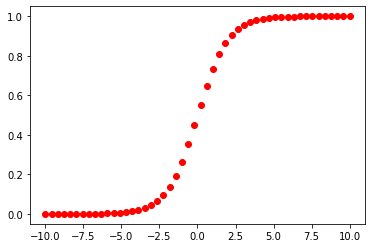

In [43]:
def show_sigmoid():
  for z in np.linspace(-10, 10):
    s = sigmoid(z)

    plt.plot(z, s, 'ro')
  plt.show()

show_sigmoid()      # Dense가 직선이 아닌 곡선으로 표현되어 더 유연하게 값을 찾아낼 수 있다. 

# linear == 직선 1개        => 2개 중 1개 고르기 
# multiple == 직선 2개이상  => 여러개 중 1개 고르기 
# sigmoid == 곡선 1개       => 2개 중 1개 고르기 
# softmax == 곡선 2개이상   => 여러개 중 1개 고르기 

- binary_cross_entropy() 함수 생성

In [44]:
def binary_cross_entropy(y, p): 
  loss_i = y * -tf.math.log(p) + (1 - y) * -tf.math.log(1 - p)
  return tf.reduce_mean(loss_i)

# mean_sqaure_error 대신사용
# 0과 1로 이뤄어져 sigmoid에 사용하기 좋다.

In [57]:
def logistic_regression():
  def Dense(x, w, b):
    return x @ w + b

  x = [[1, 2],         # 학습시간, 출석일수 (6, 2)
      [2, 1],
      [4, 5],
      [5, 4],
      [8, 9],
      [9, 8]] 

  y = [[0],               
       [0],
       [1],             # 0 == 탈락, 1 == 통과 (6, 1)
       [1],
       [1],
       [1]] 

  y = np.int32(y)       # y 데이터가 반드시 숫자여야 하기 때문에 숫자로 지정해준다. 

  w = tf.Variable(tf.random.uniform([2, 1]))   # (6, 1) = (6, 2) * (2, 1)
  b = tf.Variable(tf.random.uniform([1]))

  optimizer = tf.keras.optimizers.SGD(0.1)

  for i in range(10):
    with tf.GradientTape() as tape:
      z = Dense(x, w, b)
      hx = keras.activations.sigmoid(z)

      loss = keras.losses.binary_crossentropy(y, hx, axis = 0)

    gradient1 = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradient1, [w, b]))

    print('loss', i,':', loss.numpy())

    z = Dense(x, w, b)
    p = sigmoid(z).numpy()
    
    p_flat = p.reshape(-1)
    print(p_flat)

    p_bool = np.int32(p_flat > 0.5)
    y_flat = y.reshape(-1)
    print(p_bool)
    print(y_flat)

    equals = (p_bool == y_flat)
    print(equals)
    print('acc :', np.mean(equals))
    print('-' * 30)

logistic_regression()


loss 0 : [0.9959554]
[0.9287879  0.95044255 0.9990939  0.99938357 0.9999975  0.99999833]
[1 1 1 1 1 1]
[0 0 1 1 1 1]
[False False  True  True  True  True]
acc : 0.6666666666666666
------------------------------
loss 1 : [0.94137377]
[0.9165606  0.9416799  0.99857545 0.9990305  0.9999944  0.9999962 ]
[1 1 1 1 1 1]
[0 0 1 1 1 1]
[False False  True  True  True  True]
acc : 0.6666666666666666
------------------------------
loss 2 : [0.8879748]
[0.90264493 0.931614   0.99777395 0.99848396 0.99998736 0.9999914 ]
[1 1 1 1 1 1]
[0 0 1 1 1 1]
[False False  True  True  True  True]
acc : 0.6666666666666666
------------------------------
loss 3 : [0.8359575]
[0.8869527  0.9201419  0.99654657 0.9976458  0.9999716  0.9999807 ]
[1 1 1 1 1 1]
[0 0 1 1 1 1]
[False False  True  True  True  True]
acc : 0.6666666666666666
------------------------------
loss 4 : [0.78555274]
[0.8694433  0.9071872  0.9946885  0.996375   0.99993753 0.99995744]
[1 1 1 1 1 1]
[0 0 1 1 1 1]
[False False  True  True  True  True]

## 9_2_logistic_regression_indian

`Q` pima-indians-diabetes.csv 파일을 읽어 당뇨병을 판단하는 모델을 구축하시오
- 정확도를 표시하시오


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [79]:
indian = pd.read_csv('/content/pima-indians-diabetes.csv', skiprows = 9, header = None)

x = indian.values[: , :-1]         #(768, 8)
y = indian.values[: , -1:]         #(768, 1)
       
y = np.int32(y)

print(x.shape, y.shape)

(768, 8) (768, 1)


In [71]:
def logistic_regression_indian():
  def Dense(x, w, b):
    return x @ w + b

  w = tf.Variable(tf.random.uniform([8, 1]))   # (768, 1) = (768, 8) * (8, 1)
  b = tf.Variable(tf.random.uniform([1]))

  optimizer = tf.keras.optimizers.SGD(0.001)

  for i in range(10):
    with tf.GradientTape() as tape:
      z = Dense(x, w, b)
      hx = keras.activations.sigmoid(z)

      bce = keras.losses.BinaryCrossentropy()
      loss = bce(y, hx)

    gradient1 = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradient1, [w, b]))

    print('loss', i,':', loss.numpy())

    z = Dense(x, w, b)
    p = keras.activations.sigmoid(z).numpy()
    
    p_flat = (p > 0.5).astype(np.int32).reshape(-1)
    y_flat = y.reshape(-1)

    print('acc :', np.mean(p_flat == y_flat))
    print('-' * 30)

logistic_regression_indian()

loss 0 : 100.299644
acc : 0.3489583333333333
------------------------------
loss 1 : 90.22592
acc : 0.3489583333333333
------------------------------
loss 2 : 80.1522
acc : 0.3489583333333333
------------------------------
loss 3 : 70.07848
acc : 0.3489583333333333
------------------------------
loss 4 : 60.004757
acc : 0.3489583333333333
------------------------------
loss 5 : 50.08167
acc : 0.3515625
------------------------------
loss 6 : 40.998386
acc : 0.35546875
------------------------------
loss 7 : 33.329323
acc : 0.35546875
------------------------------
loss 8 : 26.595907
acc : 0.3763020833333333
------------------------------
loss 9 : 21.281498
acc : 0.37890625
------------------------------


## 9_3_logistic_regression_indian_split

`Q` 70% 데이터로 학습하고 30% 데이터에 대해 정확도를 계산하시오

In [73]:
from sklearn import preprocessing

In [80]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [81]:
def logistic_regression_indian():
    def dense(x, w, b):
        # (768, 1) = (768, 8) @ (8, 1)
        # (600, 1) = (600, 8) @ (8, 1)
        # (168, 1) = (168, 8) @ (8, 1)
        return x @ w + b

    x = preprocessing.scale(x)              # 표준화. 
    # x = preprocessing.minmax_scale(x)     # 정규화. 
    
    train_size = int(len(x) * 0.7)          # train_size = 600

    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    print(x_train.shape, x_test.shape)      # (537, 8) (231, 8)
    print(y_train.shape, y_test.shape)      # (537, 1) (231, 1)

    w = tf.Variable(tf.random.uniform([8, 1]))
    b = tf.Variable(tf.random.uniform([1]))

    optimizer = tf.keras.optimizers.SGD(0.01)

    for i in range(1000):
        with tf.GradientTape() as tape:
            z = dense(x_train, w, b)
            hx = keras.activations.sigmoid(z)

            bce = keras.losses.BinaryCrossentropy()
            loss = bce(y_train, hx)

        gradient = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(zip(gradient, [w, b]))

        if i % 10 == 0:
            print(i, loss.numpy())
    print()

    z = dense(x_test, w, b)
    p = keras.activations.sigmoid(z).numpy()
    # print(p)

    p_flat = (p > 0.5).astype(np.int32).reshape(-1)
    y_flat = y_test.reshape(-1)
    print(p_flat[:10])
    print(y_flat[:10])

    print('acc :', np.mean(p_flat == y_flat))
    


logistic_regression_indian()

UnboundLocalError: ignored